In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/smsspamcollection.tsv', sep='\t')

df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.sample(5)

,label,message,length,punct
1451,ham,Msg me when rajini comes.,25,1
95,spam,Your free ringtone is waiting to be collected....,158,8
1501,ham,Host-based IDPS for linux systems.,34,2
2424,ham,Lmao but its so fun...,22,3
2243,ham,Nope wif my sis lor... Aft bathing my dog then...,96,8


In [ ]:
df.shape

(5572, 4)

In [ ]:
#1. data cleaning
#2. eda
#3.text preprocessing
#4. model buiding
#5. evaluation
#6. improment dependind on evaluation
#7. website
#8. dispaly

In [ ]:
#1 Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df1 = df.drop(columns=['length','punct']) # Change 'column' to 'columns'

In [ ]:
df1.sample(5)

,label,message
4488,ham,Miss call miss call khelate kintu opponenter m...
439,ham,"Hi hope u get this txt~journey hasnt been gd,n..."
2923,ham,I've not sent it. He can send me.
2043,ham,"Me not waking up until 4 in the afternoon, sup"
4466,ham,CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I W...


In [ ]:
#label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
encoder.fit_transform(df1['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df1['label'] = encoder.fit_transform(df1['label'])

In [ ]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#checking missing values
df1.isnull().sum()

,0
label,0
message,0


In [ ]:
#check for duplicate values
df1.duplicated().sum()

403

In [ ]:
#removign duplicates
df1.drop_duplicates(keep='first')

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
df1.duplicated().sum()

403

In [ ]:
#2. EDA

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


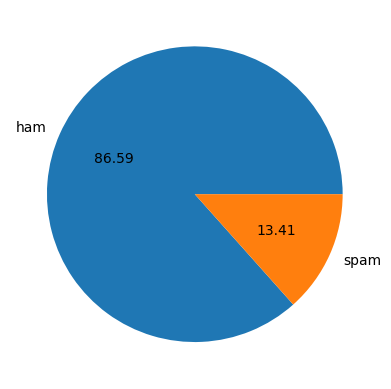

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'], autopct = "%0.2f")
plt.show()
#autopct parameter i n pie ( allows you to format the percentae lables that appear)

In [ ]:
# data i s imbalanced

In [ ]:
import nltk

In [ ]:
nltk. download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df1['message'].apply(len)

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [ ]:
df1['num_charactr'] = df1['message'].apply(len)

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
#number of words
import nltk
nltk.download('punkt_tab')
df1['message'].apply(lambda x: nltk.word_tokenize(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [ ]:
df1 ['message']. apply(lambda x: len(nltk.word_tokenize(x)))

,message
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [ ]:
df1['num_words'] = df1['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,label,message,num_charactr,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['message'].apply(lambda x: nltk.sent_tokenize(x))


,message
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will ü b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [ ]:
df1['num_sentences'] = df1['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,label,message,num_charactr,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df1[['num_charactr','num_words','num_sentences']].describe()

,num_charactr,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.490309,18.842426,2.006102
std,59.944527,13.851947,1.539977
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,62.000000,15.000000,2.000000
75%,122.000000,27.000000,3.000000
max,910.000000,220.000000,38.000000


In [ ]:
#ham
df1[df1['label']==0][['num_charactr','num_words','num_sentences']].describe()

,num_charactr,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.482902,17.425699,1.846010
std,58.442635,14.118631,1.475377
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,93.000000,23.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#spam
df1[df1['label']==1][['num_charactr','num_words','num_sentences']].describe()

,num_charactr,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.670683,27.993307,3.040161
std,28.873603,6.860440,1.548499
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
#number of words in spam is usually greater than ham

In [ ]:
import seaborn as sns

<Axes: xlabel='num_charactr', ylabel='Count'>

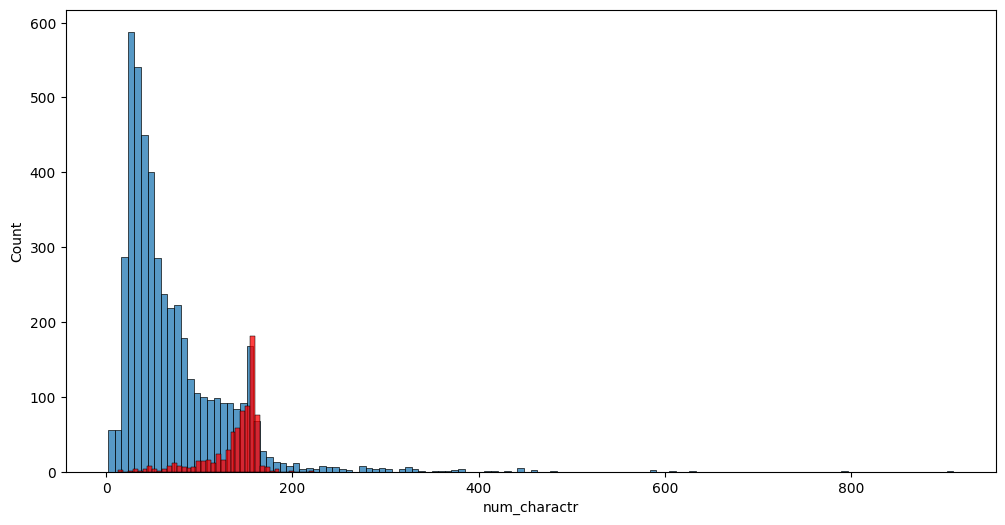

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_charactr'])
sns.histplot(df1[df1['label']==1]['num_charactr'],color='red')

In [ ]:
#num_character are more in spam message
#num_character are less in ham msg

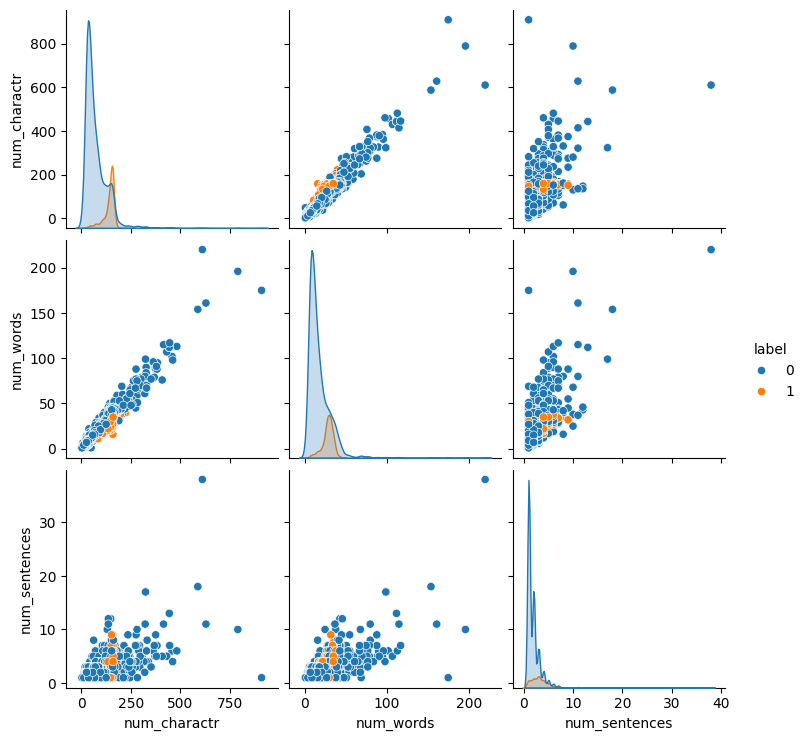

In [ ]:
#finfing correlations
sns.pairplot(df1,hue='label')

In [ ]:
df2 = df1.drop(columns=['message'])
df2

,label,num_charactr,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,160,35,4
5568,0,36,9,1
5569,0,57,15,2
5570,0,125,27,1


In [ ]:
df2.corr()

,label,num_charactr,num_words,num_sentences
label,1.000000,0.381925,0.259958,0.264230
num_charactr,0.381925,1.000000,0.966435,0.630628
num_words,0.259958,0.966435,1.000000,0.685898
num_sentences,0.264230,0.630628,0.685898,1.000000


<Axes: >

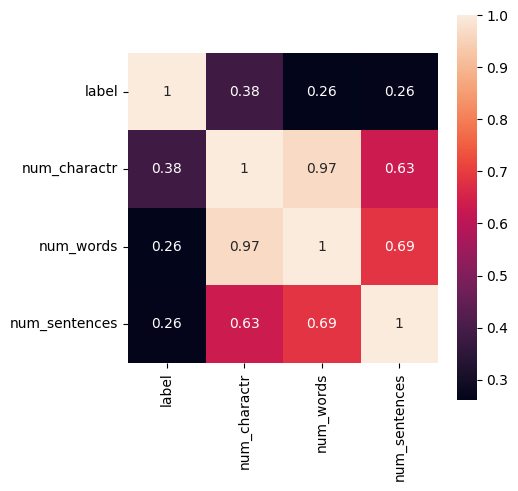

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df2.corr(), annot=True, square=True)

In [ ]:
#3. DATA PREPROCESSING

In [ ]:
#1. LOWER CASE
#2. TOKENIZATION
#3.REMOVE SPECIAL CHASRACTER
#4.REMOVING SRTOP WORDS AND PUNCTUATIONS
#5. STEMMING

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
      text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
import nltk
nltk.download('stopwords')
df1['message'].apply(transform_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,message
0,go
1,ok
2,free
3,u
4,nah
...,...
5567,
5568,
5569,piti
5570,


In [ ]:
df1['transformed_message'] = df1['message'].apply(transform_text)

In [ ]:
df1.head()

,label,message,num_charactr,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go
1,0,Ok lar... Joking wif u oni...,29,8,2,ok
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free
3,0,U dun say so early hor... U c already then say...,49,13,1,u
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah


In [ ]:
#balacing the data

In [ ]:
#select the ham data
ham = df[df['label']=="ham"]
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
#spam the data


In [ ]:
spam = df[df['label']=="spam"]
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
#check the shape of data
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
spam.sample(0) #output = no of sample in data

,label,message,length,punct


In [ ]:
#now we have to select 747 sample from hamt to balanced the data

In [ ]:
ham= ham.sample(spam.shape[0])

In [ ]:
ham.shape

(747, 4)

In [ ]:
#checl shape of data
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
#size of both ham and spam is same now this is balanced data

In [ ]:
import pandas as pd # Make sure pandas is imported

# Instead of using append, use pd.concat
data = pd.concat([ham, spam], ignore_index=True)

In [ ]:
data.head()

,label,message,length,punct
0,ham,Oh yah... We never cancel leh... Haha,38,6
1,ham,Aiyo u so poor thing... Then u dun wan 2 eat? ...,62,5
2,ham,Hey! do u fancy meetin me at 4 at cha  hav a ...,161,6
3,ham,AH POOR BABY!HOPE URFEELING BETTERSN LUV! PROB...,114,3
4,ham,"Yeah, we got one lined up for us",32,1


In [ ]:
data.shape

(1494, 4)

In [ ]:
#data visaulization

<function matplotlib.pyplot.show(close=None, block=None)>

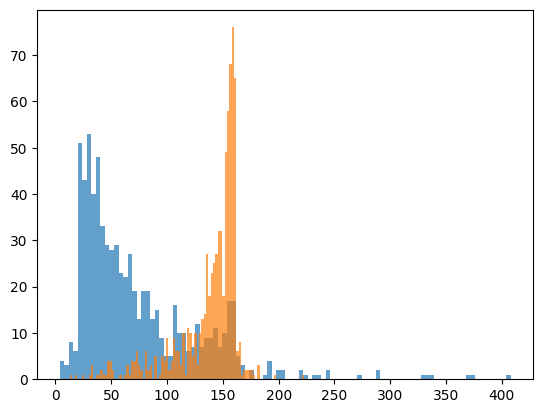

In [ ]:
#plot histogram of lenght of both ham and spam msg
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

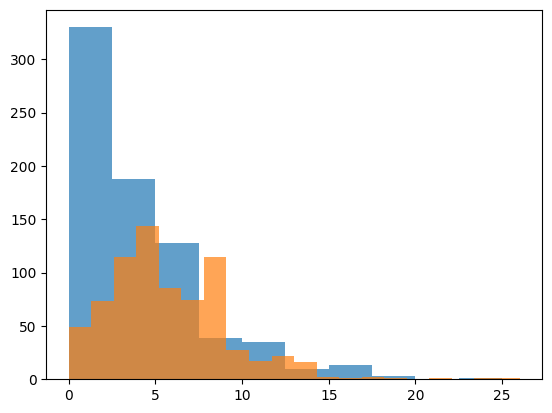

In [ ]:
#plot histogram of puncutaion of both ham and spam msg
plt.hist(data[data['label']=='ham']['punct'], bins=10, alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'], bins=20, alpha=0.7)
plt.show

In [ ]:
#spilt the dat into test and test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True)

In [ ]:
x_train

,message
465,Ok then i will come to ur home after half an hour
1229,Do you want a New Nokia 3510i Colour Phone Del...
1400,Bored housewives! Chat n date now! 0871750.77....
1017,Call from 08702490080 - tells u 2 call 0906635...
425,Sent me ur email id soon
...,...
763,Your free ringtone is waiting to be collected....
835,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216,Dorothy@kiefer.com (Bank of Granite issues Str...
559,Oh great. I.ll disturb him more so that we can...


In [ ]:
#2) building the model (random forest)


from sklearn.pipeline import Pipeline
#there will be no repeted processes for traing and training and tsting the data set seperatly,
#to avoid that we are using pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#we are importing TfidfVectorizer to utilized bag of words model in sklearn

from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier = Pipeline([('vectorizer', TfidfVectorizer()), ('classifier', RandomForestClassifier())
])

In [ ]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
#all the parameters that you can see while training the model are th default parameter

In [ ]:
#3) predicting the result (random forest)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[151,   0],
       [  9, 139]])

In [ ]:
#ham and spam
#spam and ham

In [ ]:
# classifiation_report
print (classification_report(y_test, y_pred))
#we are geting almot 95% accuracy

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       151
        spam       1.00      0.94      0.97       148

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



In [ ]:
accuracy_score(y_test, y_pred)

0.9698996655518395

In [ ]:
#prdict a real msg
classifier.predict(['Prizes and giveaways: "You\'ve won a prize! Go to [link] to claim your $500 Amazon gift card'])

array(['spam'], dtype=object)

In [ ]:
classifier.predict(['If he started searching, he will get job in few days. He has great potential and talen'])

array(['ham'], dtype=object)

In [ ]:
#  DONE YOU HAVE PREDICTS ALL TEXT